In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bmodel = 'mobnet'
memory1 = 2133000000
memory2 = 3199000000

In [3]:
def eqn(x1,x2,bmodel,memory):
    m1 = 11.40978225116858 + 0.0023098969607754207*x1 + 0.015039810900845167*x2

    m2 = 11.983543987173658 + 0.005271277589224717*x1 + 0.012503132849982737*x2
    r1 = 13.028454503595224 + 0.004169231483817848*x1 + 0.015361400504092718*x2


    r2 = 11.692711446135831 + 0.01593146757294107*x1 + 0.007878798732607788*x2


    y1 = 10.304924052410989 + 0.009445081321909623*x1 + -0.006686523491124382*x2

    y2 = 11.137877334174311 + 0.003643907628181714*x1 + 0.002974759419043393*x2


    if bmodel == 'mobnet':
        if memory == 2133000000:
            return m1
        else:
            return m2
    elif bmodel == 'resnet':
        if memory == 2133000000:
            return r1
        else:
            return r2    
    elif bmodel == 'yolo':
        if memory == 2133000000:
            return y1
        else:
            return y2
    else:
        return 0

In [4]:
def eqnt(x1,x2,bmodel,memory):
    m1 = 0.19416213035583496*x1 + -0.9192444086074829*x2 + 10.46882438659668 
    m2 = -0.032302431762218475*x1 + -0.8486483097076416*x2 + 11.489439964294434 
    r1 = 0.20764099  *x1 + -0.91330422 *x2 + 10.46966070743752

    r2 = -0.03310946 *x1 + -0.8507552 *x2 + 11.517561838755489

    y1 = 0.2010040581226349*x1 + -0.9270338416099548*x2 + 10.468754768371582 
    y2 = -0.03188270330429077*x1 + -0.8540647029876709*x2 + 11.50625991821289 
    if bmodel == 'mobnet':
        if memory == 2133000000:
            return m1
        else:
            return m2
    elif bmodel == 'resnet':
        if memory == 2133000000:
            return r1
        else:
            return r2    
    elif bmodel == 'yolo':
        if memory == 2133000000:
            return y1
        else:
            return y2
    else:
        return 0

In [5]:
# def eqn(x1,x2,bmodel,memory):
#     m1 = 11.40978225116858 + 0.0023098969607754207*x1 + 0.015039810900845167*x2
#     m2 = 11.983543987173658 + 0.005271277589224717*x1 + 0.012503132849982737*x2 
#     r1 = 13.028454503595224 + 0.004169231483817848*x1 + 0.015361400504092718*x2
#     r2 = 11.692711446135831 + 0.01593146757294107*x1 + 0.007878798732607788*x2
#     y1 = 10.304924052410989 + 0.009445081321909623*x1 + -0.006686523491124382*x2 
#     y2 = 11.137877334174311 + 0.003643907628181714*x1 + 0.002974759419043393*x2

#     if bmodel == 'mobnet':
#         if memory == 2133000000:
#             return m1
#         else:
#             return m2
#     elif bmodel == 'resnet':
#         if memory == 2133000000:
#             return r1
#         else:
#             return r2    
#     elif bmodel == 'yolo':
#         if memory == 2133000000:
#             return y1
#         else:
#             return y2
#     else:
#         return 0

In [5]:
df = pd.read_csv("mobnet"+"_cpu_gpu_"+"2133"+"_time.csv")

In [6]:
# Apply log function to all values in the DataFrame
df_log = df.applymap(lambda x: np.log(x))
df_log

/tmp/ipykernel_40152/1892362379.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log = df.applymap(lambda x: np.log(x))


,cpu_freq,gpu_freq,mem_freq,observed_time
0,5.593968,5.378745,7.665285,6.598851
1,6.045953,5.764407,7.665285,6.208904
2,6.356108,6.042039,7.665285,5.943819
3,6.592496,6.259103,7.665285,5.756808
4,6.592496,6.042039,7.665285,5.860692
5,6.783552,6.437352,7.665285,5.624889
6,6.783552,6.259103,7.665285,5.682013
7,6.943894,6.437352,7.665285,5.554436
8,7.082045,6.588583,7.665285,5.480666
9,7.203406,6.719919,7.665285,5.393491


In [16]:
from sklearn.linear_model import LinearRegression

# Create the feature matrix X
X = df_log[['cpu_freq', 'gpu_freq']]
print(X)
# Create the target variable y
y = df_log['observed_time']

# Create an instance of the LinearRegression model
model = LinearRegression()

# # Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept of the best fit line
coefficients1 = model.coef_
intercept1 = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients1)
print("Intercept:", intercept1)


    cpu_freq  gpu_freq
0   5.593968  5.378745
1   6.045953  5.764407
2   6.356108  6.042039
3   6.592496  6.259103
4   6.592496  6.042039
5   6.783552  6.437352
6   6.783552  6.259103
7   6.943894  6.437352
8   7.082045  6.588583
9   7.203406  6.719919
10  7.311619  6.835991
11  7.409258  6.939980
12  7.498205  7.034168
13  7.579883  7.120242
14  7.655391  7.170504
Coefficients: [-0.63117769 -0.07314947]
Intercept: 10.439130778288133


In [9]:
# Calculate the R-squared value
r_squared = model.score(X, y)

# Print the R-squared value
print("R-squared:", r_squared)

R-squared: 0.9904615573045502


In [12]:
lin_X = {}

In [13]:
lin_X["x1"] = np.linspace(X['cpu_freq'].min(), X['cpu_freq'].max(), 100)
lin_X["x2"] = np.linspace(X['gpu_freq'].min(), X['gpu_freq'].max(), 100)

In [14]:
# lin_X to dataframe
lin_X_df = pd.DataFrame(lin_X)
lin_X_df

,x1,x2
0,5.593968,5.378745
1,5.614790,5.396843
2,5.635613,5.414942
3,5.656435,5.433040
4,5.677257,5.451139
...,...,...
95,7.572101,7.098110
96,7.592923,7.116208
97,7.613746,7.134307
98,7.634568,7.152406


In [16]:
df = pd.read_csv(bmodel+"_cpu_gpu_"+str(int(memory2/1000000))+"_time.csv")
# Apply log function to all values in the DataFrame
df_log = df.applymap(lambda x: np.log(x))

from sklearn.linear_model import LinearRegression

# Create the feature matrix X
X = df_log[['cpu_freq', 'gpu_freq']]

# Create the target variable y
y = df_log['observed_time']

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept of the best fit line
coefficients2 = model.coef_
intercept2 = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients2)
print("Intercept:", intercept2)

# Calculate the R-squared value
r_squared = model.score(X, y)

# Print the R-squared value
print("R-squared:", r_squared)


Coefficients: [-0.97620276  0.185351  ]
Intercept: 11.009604699288573
R-squared: 0.9980679656620239


/tmp/ipykernel_167940/798135728.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log = df.applymap(lambda x: np.log(x))


In [17]:
def file_exists(filepath):
    return os.path.isfile(filepath)

def is_numeric_value(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

def populate_data_time(sampled_powermodes, path, filename, offset_dict):
    cpu_cores_multipler = 1
    cpu_frq_divider = 1
    gpu_frq_divider = 1
    mem_frq_divider = 1

    all_data = []

    for powermode in sampled_powermodes:
        # Get the offset before scaling
        offset = offset_dict.get(powermode, -1)
        file = path + "/" + "pm_" + powermode + "/" + filename
        cores = int(powermode.split("_")[0]) * cpu_cores_multipler
        cpu = int(powermode.split("_")[1]) / cpu_frq_divider
        gpu = int(powermode.split("_")[2]) / gpu_frq_divider
        mem = int(powermode.split("_")[3]) / mem_frq_divider

        temp_df = pd.read_csv(file, header=None)
        # temp_df = temp_df[temp_df[4].replace('.', '', 1).astype(str).str.isnumeric()]
        temp_df = temp_df[temp_df[4].apply(is_numeric_value)]
        # print(temp_df.head())

        if offset == -1:
            start = len(temp_df) - 40
            end = len(temp_df)
        elif offset == 0:
            start = offset + 1
            end = start + 40
        else:
            start = offset
            end = start + 40

        diff = end-start
        if len(temp_df[start:end]) != 40:
            print("Diff :", diff)
            print("Start :",start)
            print("End:",end)
            print("Offset: ",offset)
            print("Powermode :",powermode)
            print("Length :",len(temp_df))

        temp_df = temp_df.iloc[start:end]
        ###################################################################################################
        ################################# change to 5 for yolo, else 4 iloc[:,*4*]
        if bmodel == 'yolo':
            temp_df = temp_df.iloc[:,5]
        else:
            temp_df = temp_df.iloc[:,4]
        temp_df = temp_df.to_frame() 
        # print(temp_df.head())
        temp_df['Cores'] = cores
        temp_df['CPU_frequency'] = cpu
        temp_df['GPU_frequency'] = gpu
        temp_df['Memory_frequency'] = mem
        temp_df.columns = ['Minibatch_time', 'Cores', 'CPU_frequency', 'GPU_frequency', 'Memory_frequency']
        # print(temp_df.head())

        all_data.append(temp_df)

    master_df = pd.concat(all_data, ignore_index=True)
    return master_df

def populate_data_power(sampled_powermodes, path, filename, tg_filename, offset_dict, start_dict, end_dict, bmodel):

    rows = []
    for powermode in sampled_powermodes:
        offset = offset_dict.get(powermode, -1)
        start_time = start_dict.get(powermode, -1)
        end_time = end_dict.get(powermode, -1)
        file = path + "/" + "pm_" + powermode + "/" + filename
        tg_file = path + "/" + "pm_" + powermode + "/" + tg_filename

        tg_df = pd.read_csv(tg_file)
        filtered_df = tg_df[(tg_df['log_time'] >= start_time) & (tg_df['log_time'] <= end_time)]
        power_list = filtered_df['power cur'].astype(float).dropna().tolist()

        ############################################################# Change required_lenght according to model
        #Resnet: 22
        #Mobnet: 40
        #Yolo: 100
        # switch case to set required_length based on bmodel
        if bmodel == 'mobnet':
            required_length = 40
        elif bmodel == 'resnet':
            required_length = 22
        else:
            required_length = 100
        
        if len(power_list) < required_length:
            repeats_required = -(-required_length // len(power_list))  
            power_list = (power_list * repeats_required)[:required_length]

        # Split the powermode into its components
        cores, cpu, gpu, mem = powermode.split("_")

        for sample in power_list:
            rows.append({
                'cores': cores,
                'cpu': cpu,
                'gpu': gpu,
                'mem': mem,
                'power_sample': sample
            })

    minibatch_power_df = pd.DataFrame(rows)
    # minibatch_power_df.to_csv("val_power.csv", index=False)
    return minibatch_power_df

In [18]:
def extract_offsets_from_csv(csv_file):
    df = pd.read_csv(csv_file) 
    powermode_offsets = {}
    start_times = {}
    end_times = {}
    # Iterate through the DataFrame and populate the dictionary
    for _, row in df.iterrows():
        powermode = f"{int(row['cores'])}_{int(row['cpu'])}_{int(row['gpu'])}_{int(row['mem'])}"
        offset = int(row['skip_index'])
        start_time = float(row['start_time'])
        end_time = float(row['end_time'])
        powermode_offsets[powermode] = offset
        start_times[powermode] = start_time
        end_times[powermode] = end_time
    return powermode_offsets, start_times, end_times

In [19]:
def generate_powermodes():
    cpu_core_vals=[12] #6 possible values
    gpu_frequencies=[1300500000, 1236750000, 1134750000, 1032750000, 930750000, 828750000, 726750000, 624750000, 522750000, 420750000, 318750000, 216750000, 114750000] #in Hz, 13 possible values
    cpu_frequencies=[268800, 422400, 576000, 729600, 883200, 1036800, 1190400, 1344000, 1497600, 1651200, 1804800, 1958400, 2112000, 2201600] #in kHz, 14 possible values
    mem_frequencies=[memory1,memory2] #in Hz, 4 possible values
    #get combinations of all 4 as powermode Ex.2_1300500000_268800_204000000
    all_powermodes=[] #6*13*14*4=4368 possible values
    for cpu_core in cpu_core_vals:
        for cpu_frequency in cpu_frequencies:
            for gpu_frequency in gpu_frequencies:
                for mem_frequency in mem_frequencies:
                    all_powermodes.append(str(cpu_core)+"_"+str(cpu_frequency)+"_"+str(gpu_frequency)+"_"+str(mem_frequency))
    return all_powermodes


In [20]:
import os
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import random
import csv
import ast

2024-01-29 19:47:17.617445: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-29 19:47:17.637404: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 19:47:17.637420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 19:47:17.637983: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 19:47:17.641571: I tensorflow/core/platform/cpu_feature_guar

In [21]:
def NN_run_time(all_powermodes, path, filename, offsets,bmodel, memory1, memory2):

    list_stats = []

    val_time = time.time()
    val_data = []
    for powermode in all_powermodes:
        val_data.append(populate_data_time([powermode], path, filename, offsets))
    df = pd.concat(val_data, ignore_index=True)
    df.to_csv('val.csv', index=False)


    t_time = time.time()
    df = pd.read_csv("val.csv")

    # Seperate x1 and x2 based on memory
    x_2133 = df[df['Memory_frequency'] == memory1]
    x_3199 = df[df['Memory_frequency'] == memory2]
    x1=x_2133['CPU_frequency']/1000.0
    x2=x_2133['GPU_frequency']/1000000.0
    # print(x1)
    x1=np.log(x1)
    x2=np.log(x2)
    # print(x)
    # x = df.drop('Minibatch_time', axis=1)
    y1 = x_2133['Minibatch_time']
    

    y_pred_val1 = coefficients1[0]*x1 + coefficients1[1]*x2 + intercept1
    # y_pred_val1 = eqnt(x1,x2,bmodel,memory1)
    y_pred_val1 = np.exp(y_pred_val1)
    print(type(y_pred_val1))
    x1=x_3199['CPU_frequency']/1000.0
    x2=x_3199['GPU_frequency']/1000000.0
    # print(x1)
    x1=np.log(x1)
    x2=np.log(x2)
    # print(x)
    # x = df.drop('Minibatch_time', axis=1)
    y2 = x_3199['Minibatch_time']
    

    y_pred_val2 = coefficients2[0]*x1 + coefficients2[1]*x2 + intercept2
    # y_pred_val2 = eqnt(x1,x2,bmodel,memory2)
    y_pred_val2 = np.exp(y_pred_val2)  
    # Concatenate the series y_pred_val1 and y_pred_val2
    y_pred_val = np.concatenate((y_pred_val1,y_pred_val2))
    y_val = np.concatenate((y1,y2)) 
    print("Length of y_val: ",len(y_val))
    # print("Length of df: ",len(df))
    # print(y_pred_val)
    # Append y_pred_val1 and y_pred_val2 to df

    # Merge x_2133 and x_3199
    df_merge = pd.concat([x_2133, x_3199], ignore_index=True)
    df_merge['Predicted_time'] = y_pred_val
    df_merge.to_csv(bmodel+"_curvefit_predicted_time.csv",index=False)

    # y_pred_test = model.predict(testX_scaled).flatten()

    # print("Training Time:", time.time() - t_time)
    print('Validation Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_val, y_pred_val))

    # print('Test Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_pred_test, testY))



In [22]:
def NN_run_power(all_powermodes, path, filename, tg_filename, offsets, start_times, end_times,bmodel, memory1, memory2):

    val_data = []
    for powermode in all_powermodes:
        val_data.append(populate_data_power([powermode], path, filename, tg_filename, offsets, start_times, end_times, bmodel))
    df = pd.concat(val_data, ignore_index=True)
    df.to_csv('val_power.csv', index=False)

    df = pd.read_csv("val_power.csv")
    df['power_sample'] = df['power_sample']/1000.0

    x_2133 = df[df['mem'] == memory1]
    x_3199 = df[df['mem'] == memory2]

    x1=x_2133['cpu']/1000.0
    x2=x_2133['gpu']/1000000.0
    y1 = x_2133['power_sample']

    y_pred_val1 = eqn(x1,x2,bmodel,memory1)

    x1=x_3199['cpu']/1000.0
    x2=x_3199['gpu']/1000000.0
    y2 = x_3199['power_sample']

    y_pred_val2 = eqn(x1,x2,bmodel,memory2)
    y_pred_val = np.concatenate((y_pred_val1,y_pred_val2))
    y_val = np.concatenate((y1,y2)) 

    df_merge = pd.concat([x_2133, x_3199], ignore_index=True)
    df_merge['predicted_power'] = y_pred_val
    df_merge.to_csv(bmodel+"_curvefit_predicted_power.csv",index=False)

    print('Validation Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_val, y_pred_val))
    # print('Validation2 Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_pred_val, y))

    # print('Test Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_pred_test, testY))



In [23]:
# eqnt(2201.6,114.75,bmodel,memory2)

In [24]:
# path="resnet_100"
path="mobnet_v3_runs_merged"
# path="resnet_v3_runs_merged"
# path = "yolo"
filename="mn_nw4_pf2_epoch_stats.csv"
tg_filename="mn_nw4_pf2_tegrastats.csv"
offset_file = "minibatch_index_list_mobilenet_new.csv" #Path for minibatch offset file
offsets, start_times, end_times = extract_offsets_from_csv(offset_file)
sample_count_list=[50]
# sample_count_list=[100,90,80,70,60,50,40,30,20,10]
no_runs=10

all_powermodes = generate_powermodes()



Coefficients: [-0.63117769 -0.07314947]
Intercept: 10.439130778288131

In [25]:
NN_run_time(all_powermodes, path, filename, offsets, bmodel, memory1, memory2)


<class 'pandas.core.series.Series'>
Length of y_val:  14560
Validation Mean Absolute Percentage Error: 0.464006776830326


In [26]:
NN_run_power(all_powermodes, path, filename, tg_filename, offsets, start_times, end_times,bmodel, memory1, memory2)


Validation Mean Absolute Percentage Error: 0.10153919861951315


In [27]:
# data = pd.read_csv(bmodel+"_pareto_powermodes_obs_new.csv")

In [28]:

# def extract(powermode):
#     return powermode.split("_")


In [29]:
# data['powermode'] = data['powermode'].apply(extract)

In [30]:
# # Extarct the rows of the dataframe where the cores are 12 and the memory frequency is 2133
# data_filter = data[(data['powermode'].apply(lambda x: x[0]) == '12') & (data['powermode'].apply(lambda x: x[3]) == str(memory))]

In [31]:
# data_filter

In [32]:
# # X is the feature matrix with the 2 features, CPU freq and GPU freq seperately
# X = data_filter['powermode'].apply(lambda x: [int(x[1])/1000.0, int(x[2])/1000000.0]).to_list()

In [33]:
# # y is the target variable, the observed time
# y = data_filter['observed_time'].to_list()
# y_pred = data_filter['predicted_time'].to_list()

In [34]:
# y = np.array(y)

In [35]:
# X = np.array(X)

In [36]:
# error = []
# error_pred = []
# for i in range(len(X)):
#     pred = np.exp(coefficients[0]*np.log(X[i][0]) + coefficients[1]*np.log(X[i][0]) + intercept)
#     # pred1 = np.exp(coefficients[0]*np.log(X[i][0]) + coefficients[1]*np.log(X[i][0]) + intercept)
#     print("Observed Time: ", y[i])
#     print("Predicted Time: ", pred)
#     error.append(abs(y[i]-pred)/y[i]) 
#     error_pred.append(abs(y[i]-y_pred[i])/y[i])  


In [37]:
# # Find the average of errors in error list
# avg_error = sum(error)/len(error)
# avg_error_pred = sum(error_pred)/len(error_pred)

In [38]:
# print("Average Log-Log Error Time: ", avg_error)
# print("Average Error TL Pred Time: ", avg_error_pred)   

In [39]:
# # y is the target variable, the observed time
# y = data_filter['observed_power'].to_list()
# y_pred = data_filter['predicted_power'].to_list()

In [40]:
# y = np.array(y)
# X = np.array(X)

In [41]:
# error = []
# error_pred = []
# for i in range(len(X)):
#     pred = eqn(X[i][0],X[i][1],bmodel,memory)
#     # pred1 = np.exp(coefficients[0]*np.log(X[i][0]) + coefficients[1]*np.log(X[i][0]) + intercept)
#     print("Observed Power: ", y[i])
#     print("Predicted Power: ", pred)
#     error.append(abs(y[i]-pred)/y[i]) 
#     error_pred.append(abs(y[i]-y_pred[i])/y[i])  


In [42]:
# # Find the average of errors in error list
# avg_error = sum(error)/len(error)
# avg_error_pred = sum(error_pred)/len(error_pred)

In [43]:
# print("Average Log-Log Error Power: ", avg_error)
# print("Average Error TL Pred Power: ", avg_error_pred)   

In [44]:
time_df = pd.read_csv(bmodel+"_resnet_TL_curvefit_predicted_time.csv")
time_df = time_df.iloc[::40]
time_df.reset_index(inplace=True, drop=True)

power_df = pd.read_csv(bmodel+"_resnet_TL_curvefit_predicted_power.csv")
if bmodel == 'mobnet':
    required_length = 40
elif bmodel == 'resnet':
    required_length = 22
else:
    required_length = 100
power_df = power_df.iloc[::required_length]
power_df.reset_index(inplace=True, drop=True)


power_df['observed_time'] = time_df['Minibatch_time']
power_df['predicted_time'] = time_df['Predicted_time']

In [45]:
power_df.columns = ['cores', 'cpu', 'gpu', 'mem', 'observed_power', 'predicted_power', 'observed_time', 'predicted_time']

In [46]:
# Make a copy of the dataframe power_df
merged_df = power_df.copy()

In [47]:
merged_df

,cores,cpu,gpu,mem,observed_power,predicted_power,observed_time,predicted_time
0,12,268800,1300500000,2133000000,19.660,31.589957,482.059601,592.188280
1,12,268800,1236750000,2133000000,19.255,30.631169,494.655945,594.369543
2,12,268800,1134750000,2133000000,19.056,29.097108,478.569641,598.123685
3,12,268800,1032750000,2133000000,18.859,27.563047,459.978119,602.258834
4,12,268800,930750000,2133000000,17.857,26.028987,471.867279,606.857560
...,...,...,...,...,...,...,...,...
359,12,2201600,522750000,3199000000,23.775,30.124801,187.107162,105.210385
360,12,2201600,420750000,3199000000,23.779,28.849482,220.948517,101.061464
361,12,2201600,318750000,3199000000,21.985,27.574162,287.298431,95.992453
362,12,2201600,216750000,3199000000,20.376,26.298843,413.523193,89.370142


In [48]:
# Drop duplicated values from the dataframe excluding observed_power and observed_time columns
merged_df.drop_duplicates(subset=['cores', 'cpu', 'gpu', 'mem'], inplace=True)

In [49]:
merged_df.to_csv(bmodel+"_resnet_TL_curvefit_merged_observed_predicted.csv", index=False)

In [50]:
merged_df

,cores,cpu,gpu,mem,observed_power,predicted_power,observed_time,predicted_time
0,12,268800,1300500000,2133000000,19.660,31.589957,482.059601,592.188280
1,12,268800,1236750000,2133000000,19.255,30.631169,494.655945,594.369543
2,12,268800,1134750000,2133000000,19.056,29.097108,478.569641,598.123685
3,12,268800,1032750000,2133000000,18.859,27.563047,459.978119,602.258834
4,12,268800,930750000,2133000000,17.857,26.028987,471.867279,606.857560
...,...,...,...,...,...,...,...,...
359,12,2201600,522750000,3199000000,23.775,30.124801,187.107162,105.210385
360,12,2201600,420750000,3199000000,23.779,28.849482,220.948517,101.061464
361,12,2201600,318750000,3199000000,21.985,27.574162,287.298431,95.992453
362,12,2201600,216750000,3199000000,20.376,26.298843,413.523193,89.370142


In [51]:
def is_pareto_efficient(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient

In [52]:
def plot_pareto_front(data, bmodel, full_data):

    # full_data = pd.read_csv(full_data)
    data['powermode'] = data['cores'].astype(str) + '_' + data['cpu'].astype(str) + '_' + data['gpu'].astype(str) + '_' + data['mem'].astype(str)
    
    
    fig, ax = plt.subplots()
    x_pred = data['predicted_power']
    y_pred = data['predicted_time']

    # Find pareto points
    pareto_efficient_pred = is_pareto_efficient(np.array([x_pred, y_pred]).T)
    
    pareto_data_pred = data[pareto_efficient_pred]
    pareto_x_pred = pareto_data_pred['predicted_power']
    pareto_y_pred = pareto_data_pred['predicted_time']
    pareto_x_pred_obs = pareto_data_pred['observed_power']
    pareto_y_pred_obs = pareto_data_pred['observed_time']
    
    # Sort Pareto points by x-values (Energy)
    sorted_indices_pred = np.argsort(pareto_x_pred)
    sorted_indices_pred_obs = np.argsort(pareto_x_pred_obs)
    print(sorted_indices_pred)
    print(sorted_indices_pred_obs)
    sorted_pareto_x_pred = pareto_x_pred.iloc[sorted_indices_pred].values
    sorted_pareto_y_pred = pareto_y_pred.iloc[sorted_indices_pred].values
    sorted_pareto_x_pred_obs = pareto_x_pred_obs.iloc[sorted_indices_pred_obs].values
    sorted_pareto_y_pred_obs = pareto_y_pred_obs.iloc[sorted_indices_pred_obs].values


    data = pd.read_csv(full_data)
    data['observed_time'] = data['observed_time']/1000
    # print(data)
    # Extract the relevant data
    x_obs = data['observed_power']
    y_obs = data['observed_time']
    # Find pareto points
    pareto_efficient_obs = is_pareto_efficient(np.array([x_obs, y_obs]).T)    
    # Extract Pareto points
    pareto_data_obs = data[pareto_efficient_obs]
    pareto_x_obs = pareto_data_obs['observed_power']
    pareto_y_obs = pareto_data_obs['observed_time'] 
    # print(pareto_x_obs)   
    # Sort Pareto points by x-values (Energy)
    sorted_indices_obs = np.argsort(pareto_x_obs)
    # print(sorted_indices_obs)
    sorted_pareto_x_obs = pareto_x_obs.iloc[sorted_indices_obs].values
    sorted_pareto_y_obs = pareto_y_obs.iloc[sorted_indices_obs].values
    # print(sorted_pareto_x_obs)
    # print(sorted_pareto_y_obs)
    # Set minor gridlines
    plt.minorticks_on()
    ax.yaxis.grid(which = 'minor', linestyle = '-', linewidth = 0.25, color = 'grey')

    ax.xaxis.grid(which = 'minor', linestyle = '-', linewidth = 0.25, color = 'grey')

    # Create a scatter plot
    # ax.figure(figsize=(10, 6))

    # ax.scatter(x_obs, y_obs, s=2, label='Observed points', color='#FF6EC7')

    # ax.scatter(x_pred, y_pred, s=2, label='Predicted points', color='#94E5FF')

    ax.scatter(sorted_pareto_x_obs, sorted_pareto_y_obs, color='#D21404', s=2, label='Obs Pareto points')

    ax.plot(sorted_pareto_x_obs, sorted_pareto_y_obs, color='#D21404', label='Obs Pareto front', alpha=0.6)

    ax.scatter(sorted_pareto_x_pred, sorted_pareto_y_pred, color='blue', s=2, label='Pred Pareto points')

    ax.plot(sorted_pareto_x_pred, sorted_pareto_y_pred, color='blue', label='Pred Obs Pareto front', alpha=0.6)

    ax.scatter(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='green', s=2, label='Pred Obs Pareto points')

    ax.plot(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='green', label='Pred Obs Pareto front', alpha=0.6)

    # for i in range(0,len(sorted_pareto_x_pred)):
    #     ax.plot([sorted_pareto_x_pred[i], sorted_pareto_x_pred_obs[i]], [sorted_pareto_y_pred[i], sorted_pareto_y_pred_obs[i]], color='black', alpha=0.6)

    
    ax.set_xlim(10, 50)

    ax.set_ylim(0, 5000)
    # Adjust axis limits to zoom in on the region of Pareto points
    # plt.xlim(sorted_pareto_x.min() * 0.95, sorted_pareto_x.max() * 1.05)
    # plt.ylim(sorted_pareto_y.min() * 0.95, sorted_pareto_y.max() * 1.05)
    ax.set_xlabel('Power (W)')

    ax.set_ylabel('Time (s)')

    plt.legend()

    # plt.title('Scatter plot of Power vs Time with Pareto front')

    plt.grid(True)
    plt.savefig('ScatterPlot_curvefit_'+bmodel+'.png')
    plt.savefig('ScatterPlot_curvefit_'+bmodel+'.pdf',dpi=300,format='pdf')
    plt.show()

    # Create a new column 'powermode' in data df by concatenating cores, cpu, gpu and mem
    # data['powermode'] = data['cores'].astype(str) + '_' + data['cpu'].astype(str) + '_' + data['gpu'].astype(str) + '_' + data['mem'].astype(str)

    # Save the corresponding power modes of the Pareto points to a csv
    pareto_powermodes_obs = bmodel+'_resnet_TL_curvefit_pareto_powermodes_obs_new.csv'
    pareto_powermodes_pred = bmodel+'_resnet_TL_curvefit_pareto_powermodes_pred_new.csv'  
    # pareto_data_obs[['powermode','predicted_time','predicted_power','observed_time','observed_power']].to_csv(pareto_powermodes_obs, index=False)
    # pareto_data_pred[['powermode','predicted_time','predicted_power','observed_time','observed_power']].to_csv(pareto_powermodes_pred, index=False)


In [53]:
# plot_pareto_front(merged_df, bmodel, bmodel+"_resnet_TL_curvefit_merged_observed_predicted.csv")

In [54]:
# def plot_pareto_front(data, bmodel, full_data):

#     # full_data = pd.read_csv(full_data)
#     data['powermode'] = data['cores'].astype(str) + '_' + data['cpu'].astype(str) + '_' + data['gpu'].astype(str) + '_' + data['mem'].astype(str)
    
    
#     fig, ax = plt.subplots()
#     x_pred = data['predicted_power']
#     y_pred = data['predicted_time']

#     # Find pareto points
#     pareto_efficient_pred = is_pareto_efficient(np.array([x_pred, y_pred]).T)
    
#     pareto_data_pred = data[pareto_efficient_pred]
#     pareto_x_pred = pareto_data_pred['predicted_power']
#     pareto_y_pred = pareto_data_pred['predicted_time']
#     pareto_x_pred_obs = pareto_data_pred['observed_power']
#     pareto_y_pred_obs = pareto_data_pred['observed_time']
    
#     # Sort Pareto points by x-values (Energy)
#     sorted_indices_pred = np.argsort(pareto_x_pred)
#     # sorted_indices_pred_obs = np.argsort(pareto_x_pred_obs)
#     print(sorted_indices_pred)
#     # print(sorted_indices_pred_obs)
#     sorted_pareto_x_pred = pareto_x_pred.iloc[sorted_indices_pred].values
#     sorted_pareto_y_pred = pareto_y_pred.iloc[sorted_indices_pred].values
#     sorted_pareto_x_pred_obs = pareto_x_pred_obs.iloc[sorted_indices_pred].values
#     sorted_pareto_y_pred_obs = pareto_y_pred_obs.iloc[sorted_indices_pred].values


#     data = pd.read_csv(full_data)
#     data['observed_time'] = data['observed_time']/1000
#     # print(data)
#     # Extract the relevant data
#     x_obs = data['observed_power']
#     y_obs = data['observed_time']
#     # Find pareto points
#     pareto_efficient_obs = is_pareto_efficient(np.array([x_obs, y_obs]).T)    
#     # Extract Pareto points
#     pareto_data_obs = data[pareto_efficient_obs]
#     pareto_x_obs = pareto_data_obs['observed_power']
#     pareto_y_obs = pareto_data_obs['observed_time'] 
#     # print(pareto_x_obs)   
#     # Sort Pareto points by x-values (Energy)
#     sorted_indices_obs = np.argsort(pareto_x_obs)
#     # print(sorted_indices_obs)
#     sorted_pareto_x_obs = pareto_x_obs.iloc[sorted_indices_obs].values
#     sorted_pareto_y_obs = pareto_y_obs.iloc[sorted_indices_obs].values
#     # print(sorted_pareto_x_obs)
#     # print(sorted_pareto_y_obs)
#     # Set minor gridlines
#     plt.minorticks_on()
#     ax.yaxis.grid(which = 'minor', linestyle = '-', linewidth = 0.25, color = 'grey')

#     ax.xaxis.grid(which = 'minor', linestyle = '-', linewidth = 0.25, color = 'grey')

#     # Create a scatter plot
#     # ax.figure(figsize=(10, 6))

#     # ax.scatter(x_obs, y_obs, s=2, label='Observed points', color='#FF6EC7')

#     # ax.scatter(x_pred, y_pred, s=2, label='Predicted points', color='#94E5FF')

#     ax.scatter(sorted_pareto_x_obs, sorted_pareto_y_obs, color='#D21404', s=2, label='Obs Pareto points')

#     ax.plot(sorted_pareto_x_obs, sorted_pareto_y_obs, color='#D21404', label='Obs Pareto front', alpha=0.6)

#     ax.scatter(sorted_pareto_x_pred, sorted_pareto_y_pred, color='blue', s=2, label='Pred Pareto points')

#     ax.plot(sorted_pareto_x_pred, sorted_pareto_y_pred, color='blue', label='Pred Obs Pareto front', alpha=0.6)

#     ax.scatter(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='green', s=2, label='Pred Obs Pareto points')

#     # ax.plot(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='green', label='Pred Obs Pareto front', alpha=0.6)

#     for i in range(0,len(sorted_pareto_x_pred)):
#         ax.plot([sorted_pareto_x_pred[i], sorted_pareto_x_pred_obs[i]], [sorted_pareto_y_pred[i], sorted_pareto_y_pred_obs[i]], color='black', alpha=0.6)
#         print(sorted_pareto_x_pred[i], sorted_pareto_x_pred_obs[i], sorted_pareto_y_pred[i], sorted_pareto_y_pred_obs[i])

    
#     ax.set_xlim(10, 50)

#     ax.set_ylim(0, 5000)
#     # Adjust axis limits to zoom in on the region of Pareto points
#     # plt.xlim(sorted_pareto_x.min() * 0.95, sorted_pareto_x.max() * 1.05)
#     # plt.ylim(sorted_pareto_y.min() * 0.95, sorted_pareto_y.max() * 1.05)
#     ax.set_xlabel('Power (W)')

#     ax.set_ylabel('Time (s)')

#     plt.legend()

#     # plt.title('Scatter plot of Power vs Time with Pareto front')

#     plt.grid(True)
#     plt.savefig('ScatterPlot_curvefit_'+bmodel+'.png')
#     plt.savefig('ScatterPlot_curvefit_'+bmodel+'.pdf',dpi=300,format='pdf')
#     plt.show()

#     # Create a new column 'powermode' in data df by concatenating cores, cpu, gpu and mem
#     # data['powermode'] = data['cores'].astype(str) + '_' + data['cpu'].astype(str) + '_' + data['gpu'].astype(str) + '_' + data['mem'].astype(str)

#     # Save the corresponding power modes of the Pareto points to a csv
#     pareto_powermodes_obs = bmodel+'_resnet_TL_curvefit_pareto_powermodes_obs_new.csv'
#     pareto_powermodes_pred = bmodel+'_resnet_TL_curvefit_pareto_powermodes_pred_new.csv'  
#     pareto_data_obs[['powermode','predicted_time','predicted_power','observed_time','observed_power']].to_csv(pareto_powermodes_obs, index=False)
#     pareto_data_pred[['powermode','predicted_time','predicted_power','observed_time','observed_power']].to_csv(pareto_powermodes_pred, index=False)


12      0
25      1
38      2
51      3
64      4
77      5
90      6
103     7
116     8
129     9
142    10
155    11
168    12
181    13
259    14
272    15
285    16
298    17
311    18
324    19
337    20
350    21
363    22
Name: predicted_power, dtype: int64
12      0
25      1
38      2
51      4
64      5
77      3
90      6
103     7
116     8
129    14
142    15
155    10
168     9
181    11
259    16
272    17
285    19
298    18
311    12
324    13
337    20
350    22
363    21
Name: observed_power, dtype: int64


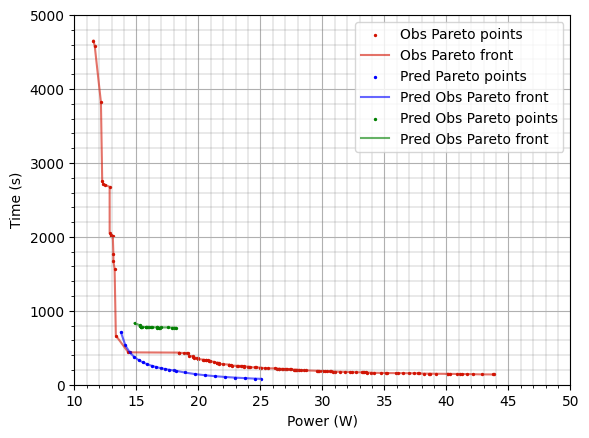

In [55]:
plot_pareto_front(merged_df, bmodel, 'merged_observed_predicted_'+bmodel+'_new.csv')